# $$ Práctica\ Final $$

### $$Ajuste\ de\ Modelos\ de\ Regresión$$
#### $$ Mariana\ Lugo\ Ibarra\ y\ Miguel\ Ángel\ Reyes\ Retana$$

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

In [4]:
datos<-read.csv("Datos/datos.csv")

La pregunta de investigación que queremos responder es si existe una relación estadísticamente significativa entre los casos confirmados y defunciones por COVID-19 y la pobreza o riqueza de los municipios, incorporando la información de incidencia delictiva como control.

Para que se cumplan los supuesto del modelo clásico de regresión lineal se analiza la correlación entre las variables regresoras y las independientes. 

Se realizaran dos modelos:

* Modelo 1: Regresión con los casos confirmados por COVID-19 como variable dependiente (confirmados_total). 
* Modelo 2: Regresión con las defunciones por COVID-19 como variable dependiente (defunciones_total). 

Las variables regresoras son promedios municipales y son las siguientes:

* $precio\_mean:$ Precio de venta promedio de las viviendas financiadas por Infonavit como proxy de riqueza de un municipio. 
* $salario\_mean:$ Salario diario intregrado promedio de los acreditados del Infonavit (de 2010 a junio 2020).
* $ts\_promedio\_h:$ Tasa de homicidios por cada ciel mil habitantes (promedio de 2015 a mayo 2020). 
* $ts\_promedio\_r:$ Tasa de robo a vehículo automotor por cada ciel mil habitantes (promedio de 2015 a mayo 2020). 
* $pob\_porc\_2015:$ Porcentaje de población en pobreza 2015 (CONEVAL).
* $pob\_per\_2015:$ Personas en situación de pobreza 2015 (CONEVAL).

Se construyen las matrices de correlación para evitar problemas de **multicolinealidad** de las variables regresoras:

[1] "Matriz de Correlación del Modelo 1"


,confirmados_total,precio_mean,salario_mean,poblacion,ts_promedio_h,ts_promedio_r,pob_porc_2015,pob_per_2015
confirmados_total,1.000000000,0.23028817,0.1352350153,0.86299432,-0.0042601778,0.36623441,-0.302418395,0.035609819
precio_mean,0.230288173,1.00000000,0.7405319001,0.19342225,-0.0296340440,0.18687659,-0.091224687,0.010799455
salario_mean,0.135235015,0.74053190,1.0000000000,0.10245462,0.0004865326,0.16704935,-0.013524923,0.029165025
poblacion,0.862994315,0.19342225,0.1024546153,1.00000000,0.0164353494,0.45572538,-0.335986706,0.035037121
ts_promedio_h,-0.004260178,-0.02963404,0.0004865326,0.01643535,1.0000000000,0.22242027,-0.128554425,0.015106582
ts_promedio_r,0.366234408,0.18687659,0.1670493487,0.45572538,0.2224202664,1.00000000,-0.261185304,0.053285693
pob_porc_2015,-0.302418395,-0.09122469,-0.0135249226,-0.33598671,-0.1285544249,-0.26118530,1.000000000,0.005486007
pob_per_2015,0.035609819,0.01079945,0.0291650253,0.03503712,0.0151065818,0.05328569,0.005486007,1.000000000


[1] "Matriz de Correlación del Modelo 2"


,defunciones_total,precio_mean,salario_mean,poblacion,ts_promedio_h,ts_promedio_r,pob_porc_2015,pob_per_2015
defunciones_total,1.00000000,0.19768339,0.1221809052,0.84504955,0.0112647440,0.40884302,-0.261464504,0.034092712
precio_mean,0.19768339,1.00000000,0.7405319001,0.19342225,-0.0296340440,0.18687659,-0.091224687,0.010799455
salario_mean,0.12218091,0.74053190,1.0000000000,0.10245462,0.0004865326,0.16704935,-0.013524923,0.029165025
poblacion,0.84504955,0.19342225,0.1024546153,1.00000000,0.0164353494,0.45572538,-0.335986706,0.035037121
ts_promedio_h,0.01126474,-0.02963404,0.0004865326,0.01643535,1.0000000000,0.22242027,-0.128554425,0.015106582
ts_promedio_r,0.40884302,0.18687659,0.1670493487,0.45572538,0.2224202664,1.00000000,-0.261185304,0.053285693
pob_porc_2015,-0.26146450,-0.09122469,-0.0135249226,-0.33598671,-0.1285544249,-0.26118530,1.000000000,0.005486007
pob_per_2015,0.03409271,0.01079945,0.0291650253,0.03503712,0.0151065818,0.05328569,0.005486007,1.000000000


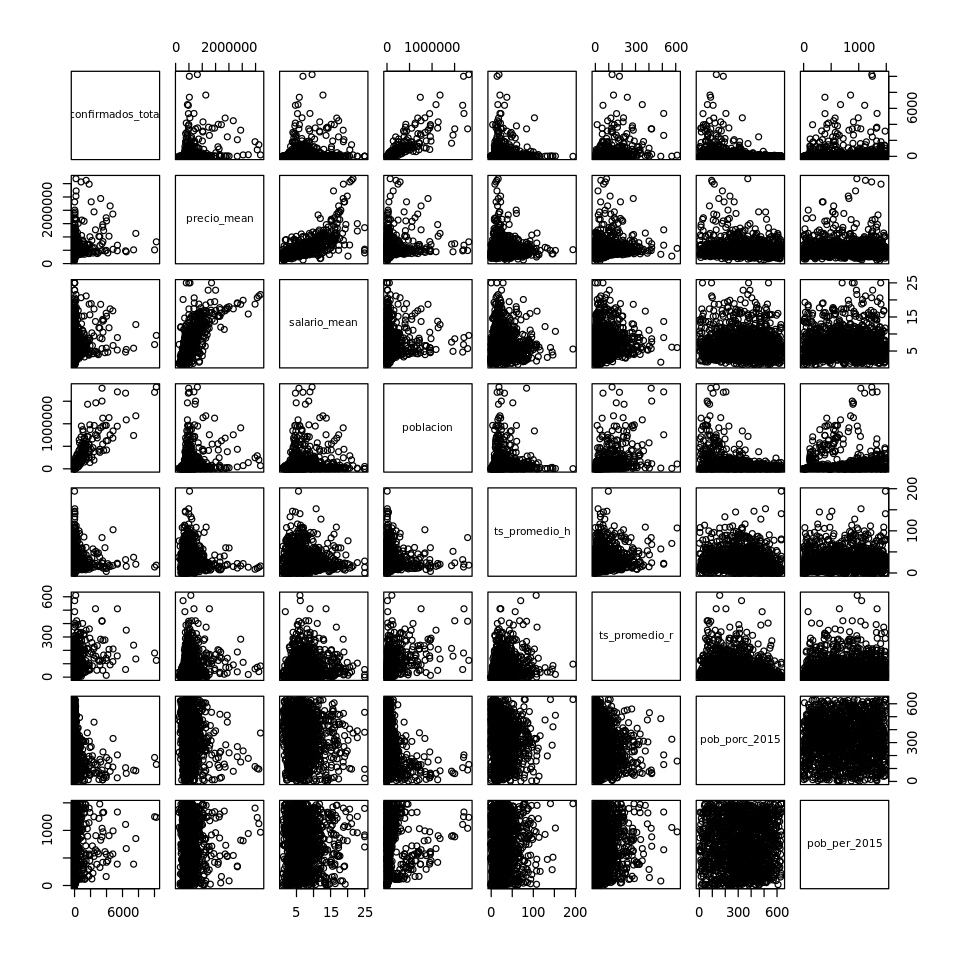

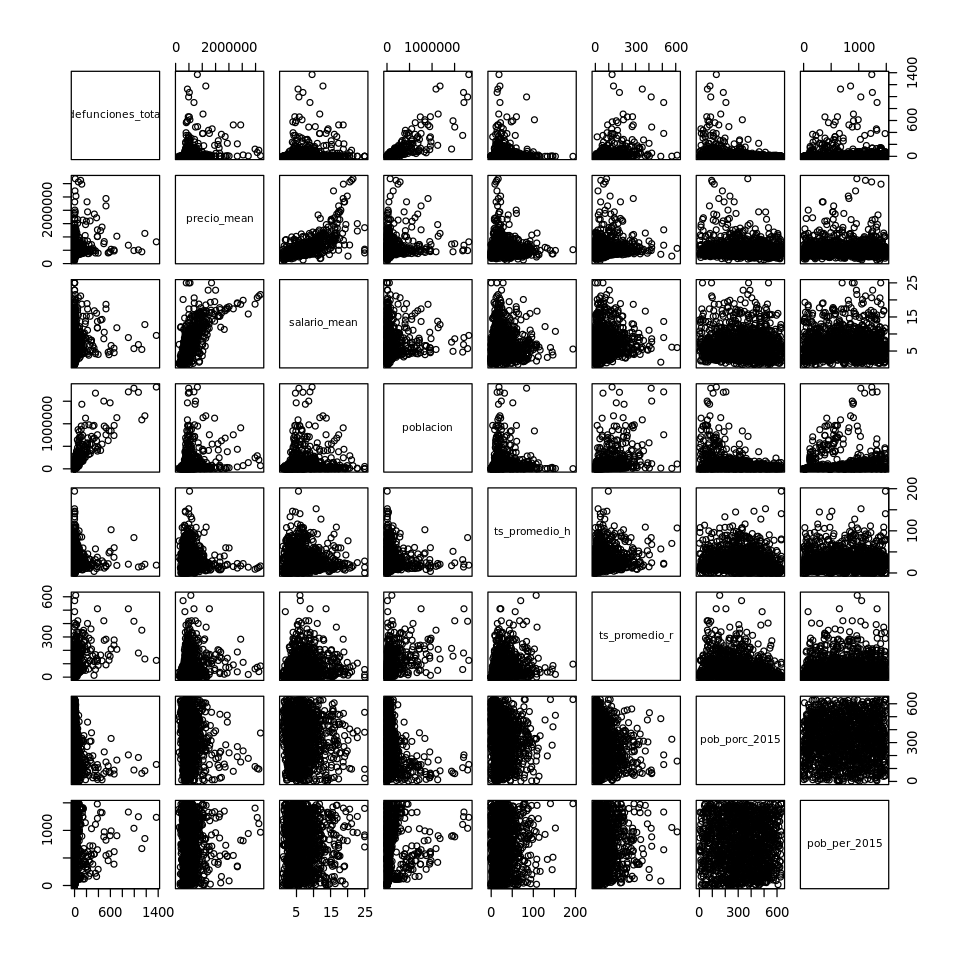

In [5]:
datos$pob_porc_2015<-as.numeric(datos$pob_porc_2015)
datos$pob_per_2015<-as.numeric(datos$pob_per_2015)
print("Matriz de Correlación del Modelo 1")
mcorr1<-datos[, c(7,3:5, 9:10,13:14)]    
cor(mcorr1,use="pairwise.complete.obs") 
pairs(mcorr1)
print("Matriz de Correlación del Modelo 2")
mcorr2<-datos[, c(8,3:5, 9:10,13:14)]
cor(mcorr2,use="pairwise.complete.obs") 
pairs(mcorr2)

De acuerdo con las matrices de correlación observamos que existe una alta correlación entre el salario diario integrado promedio y el precio de venta promedio, por lo que quitaremos alguna de las dos variables en el ajuste del modelo para evitar problemas de multicolinealidad.
 
De igual forma, en la matriz del Modelo 2, observamos alta correlación entre la población y la variable dependiente (defunciones totales). Lo anterior,podría resultar en que la población explica el número de defunciones. Se explorán los modelos creando tasas de defunciones y casos confirmados por cada cien mil habitantes.

#### Determinación de variables de ingreso para el Modelo 1:

Graficamos los casos confirmados contra el logaritmos de las siguientes 3 variables de ingreso para observar si existe una relación negativa entre éstos:

* Precio promedio
* Salario diario integrado promedio 
* Porcentaje de población en pobreza.

In [6]:
mcorr1$log_confirmados<-log(mcorr1$confirmados_total)
mcorr1$log_precio<-log(mcorr1$precio_mean)
mcorr1$log_salario<-log(mcorr1$salario_mean)
mcorr1$ts_confirmados<-(mcorr1$confirmados_total/mcorr1$poblacion)*100000
mcorr1$log_ts_confirmados<-log(mcorr1$ts_confirmados)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


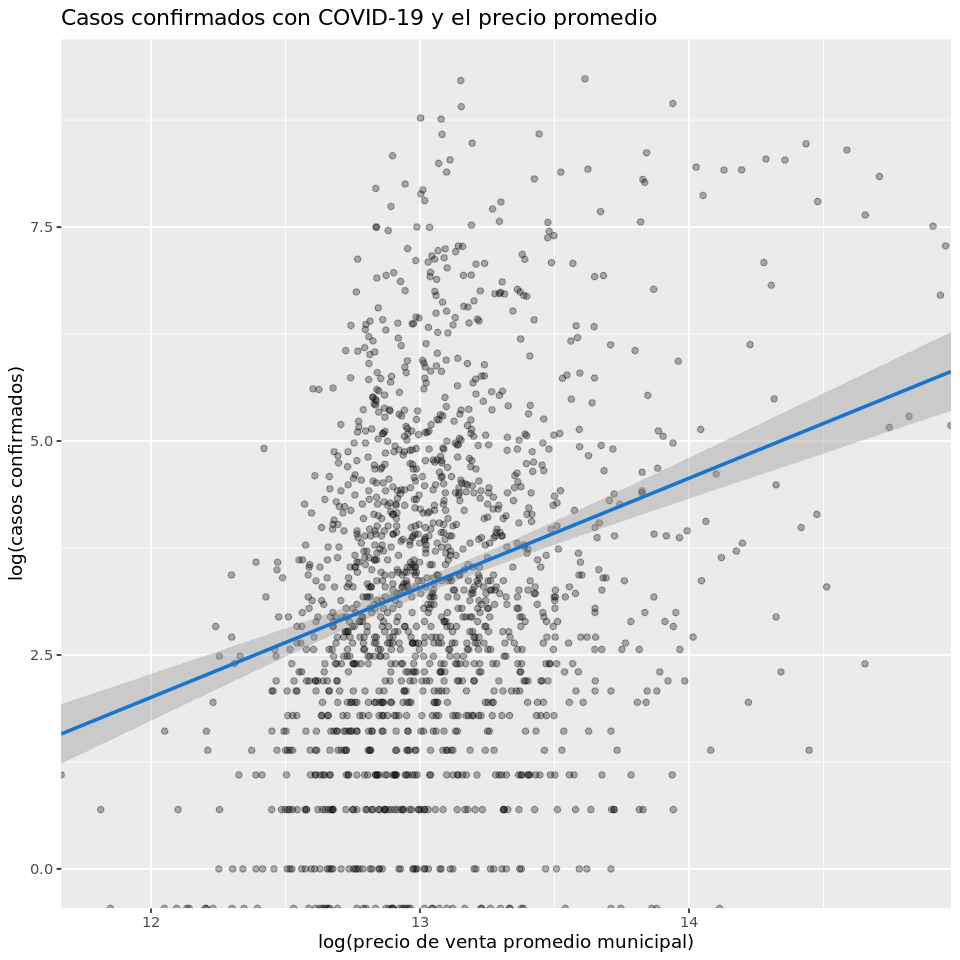

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


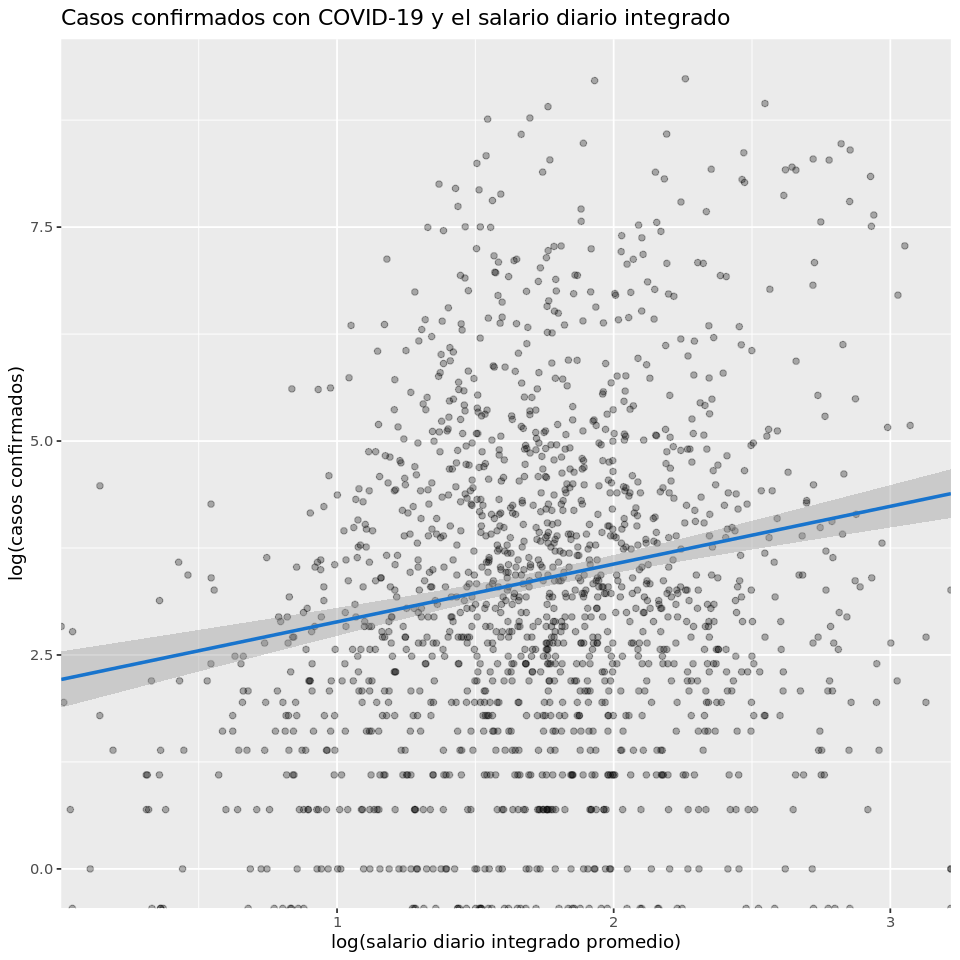

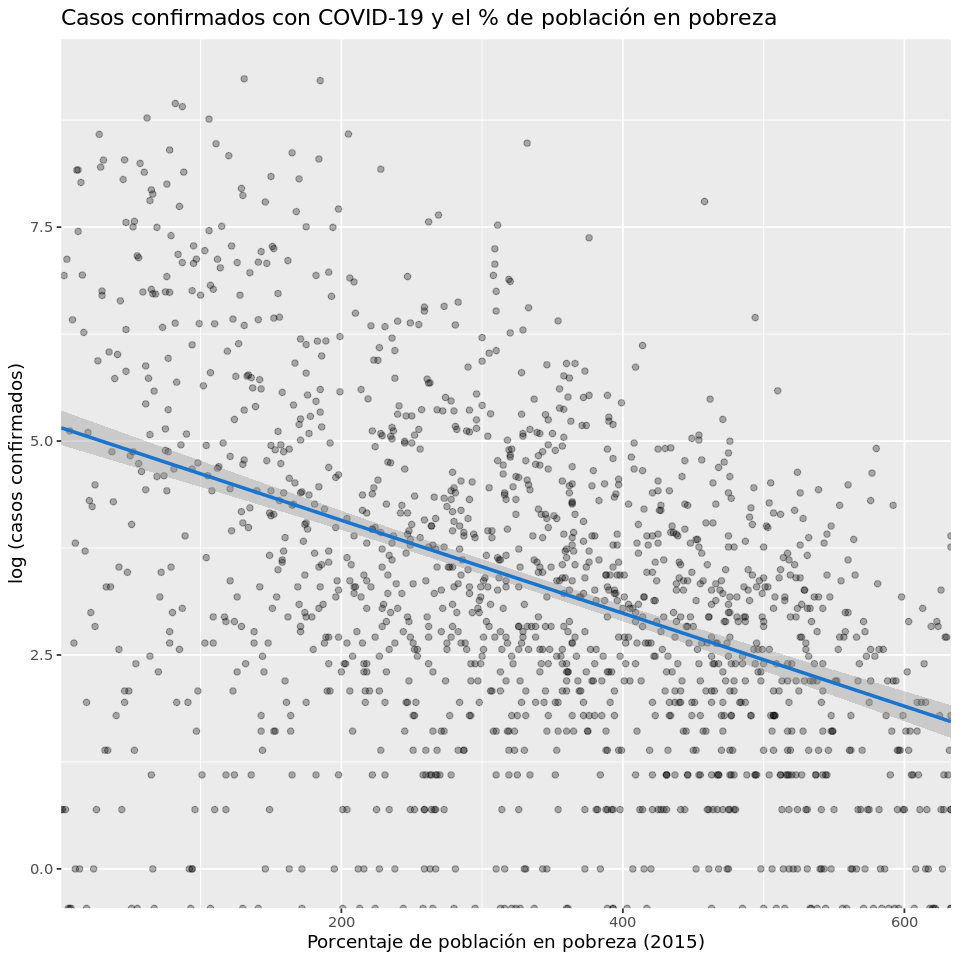

In [8]:
plot_1<-ggplot(mcorr1, aes(x=log_precio, y=log_confirmados))
plot_1 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(casos confirmados)") 

plot_2<-ggplot(mcorr1, aes(x=log_salario, y=log_confirmados))
plot_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(casos confirmados)") 

plot_2<-ggplot(mcorr1, aes(x=pob_porc_2015, y=log_confirmados))
plot_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el % de población en pobreza", 
       x = "Porcentaje de población en pobreza (2015)", y = "log (casos confirmados)") 

De las gráficas anteriores podemos ver que el porcentaje de pobreza por municipio es la variable que es consistente con nuestra hipótesis de investigación. Con lo anterior se concluye que los datos del Infonavit están sesgados a su población de acreditados. 

Se grafica contra el logaritmo de la tasa de casos confirmados por cada cien mil habitantes.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


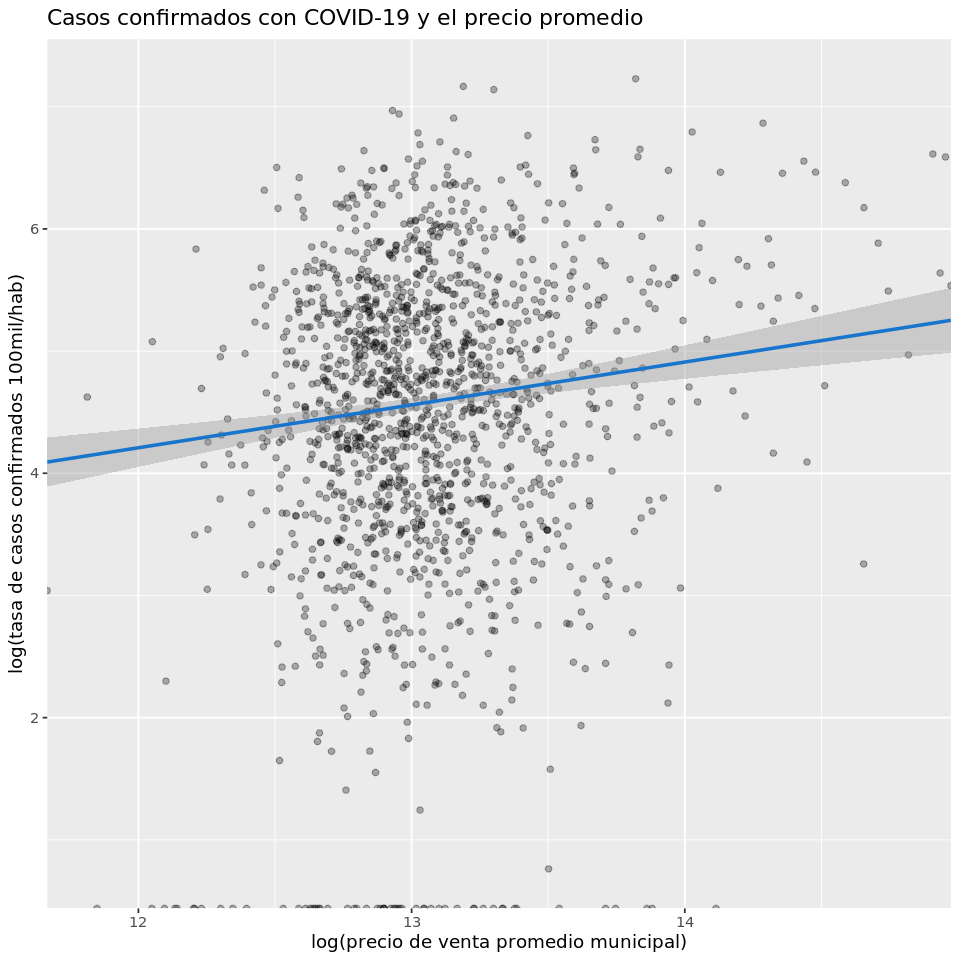

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


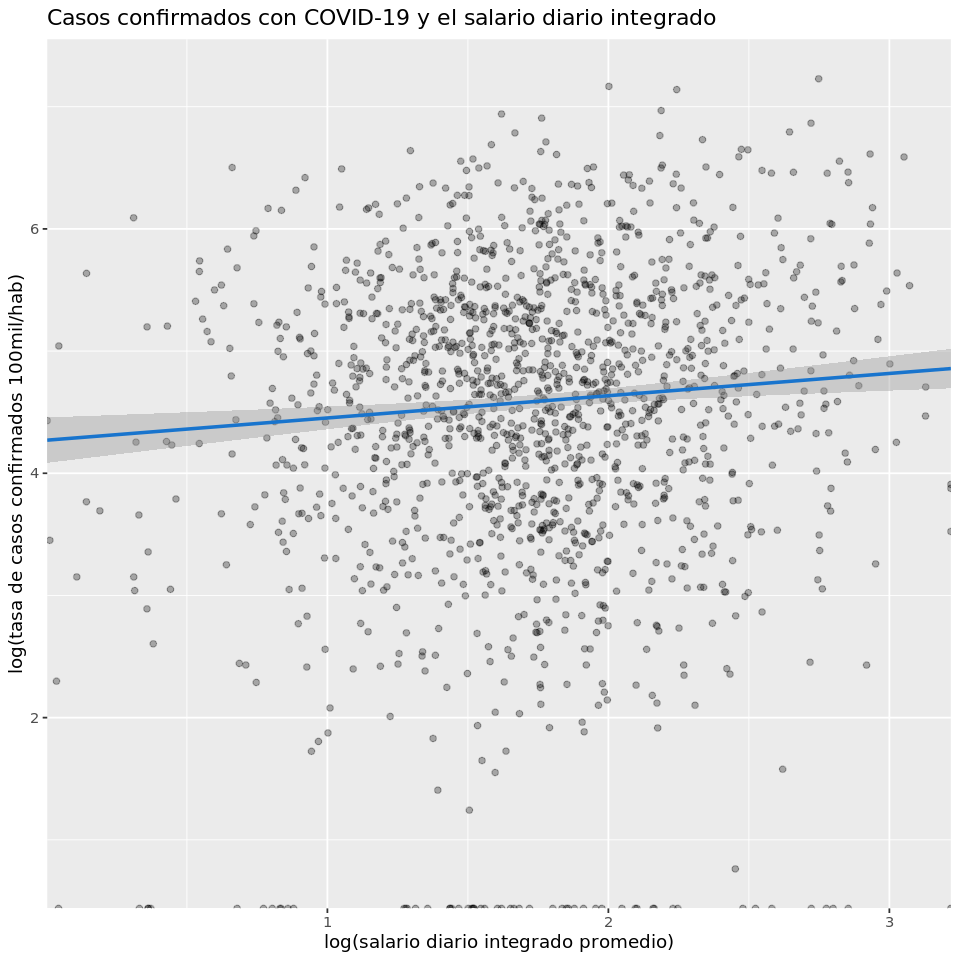

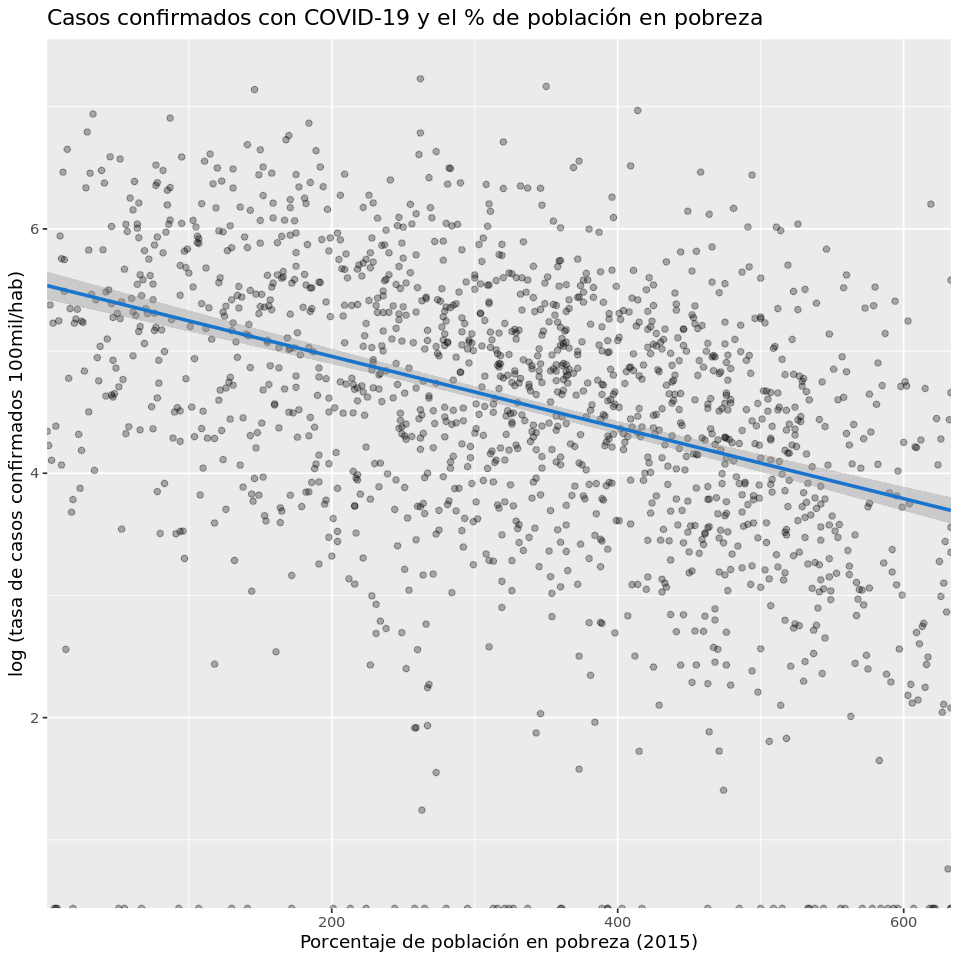

In [9]:
plot_1<-ggplot(mcorr1, aes(x=log_precio, y=log_ts_confirmados))
plot_1 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(tasa de casos confirmados 100mil/hab)") 

plot_2<-ggplot(mcorr1, aes(x=log_salario, y=log_ts_confirmados))
plot_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(tasa de casos confirmados 100mil/hab)") 

plot_2<-ggplot(mcorr1, aes(x=pob_porc_2015, y=log_ts_confirmados))
plot_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el % de población en pobreza", 
       x = "Porcentaje de población en pobreza (2015)", y = "log (tasa de casos confirmados 100mil/hab)") 

$Conclusión:$
De las gráficas anteriores concluimos que la variable que debe incorporarse al ajuste del modelo es el porcentaje de población en pobreza. Mediante el análisis con las variables del Infonavit en escala logarítmica y el logaritmo de tasa de casos confirmados por 100mil/hab, se concluye que no hay relación entre ellas.

#### Determinación de Variables de Ingreso para el Modelo 2:

Graficamos las defunciones contra el logaritmos de las siguientes 3 variables de ingreso para observar si existe una relación negativa entre éstos:

* Precio promedio
* Salario diario integrado promedio 
* Porcentaje de población en pobreza.

In [10]:
mcorr2$log_defunciones_total<-log(mcorr1$confirmados_total)
mcorr2$log_precio<-log(mcorr2$precio_mean)
mcorr2$log_salario<-log(mcorr2$salario_mean)
mcorr2$ts_defunciones<-(mcorr2$defunciones_total/mcorr2$poblacion)*100000
mcorr2$log_ts_defunciones<-log(mcorr2$ts_defunciones)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


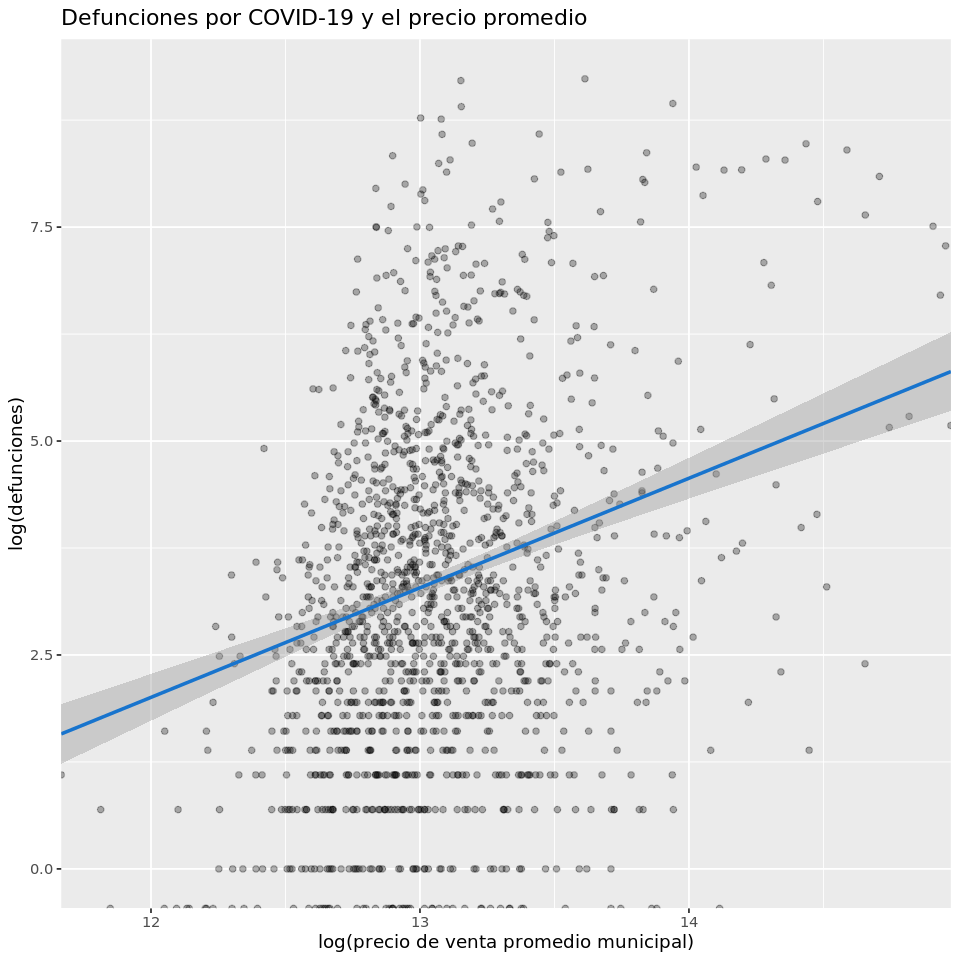

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


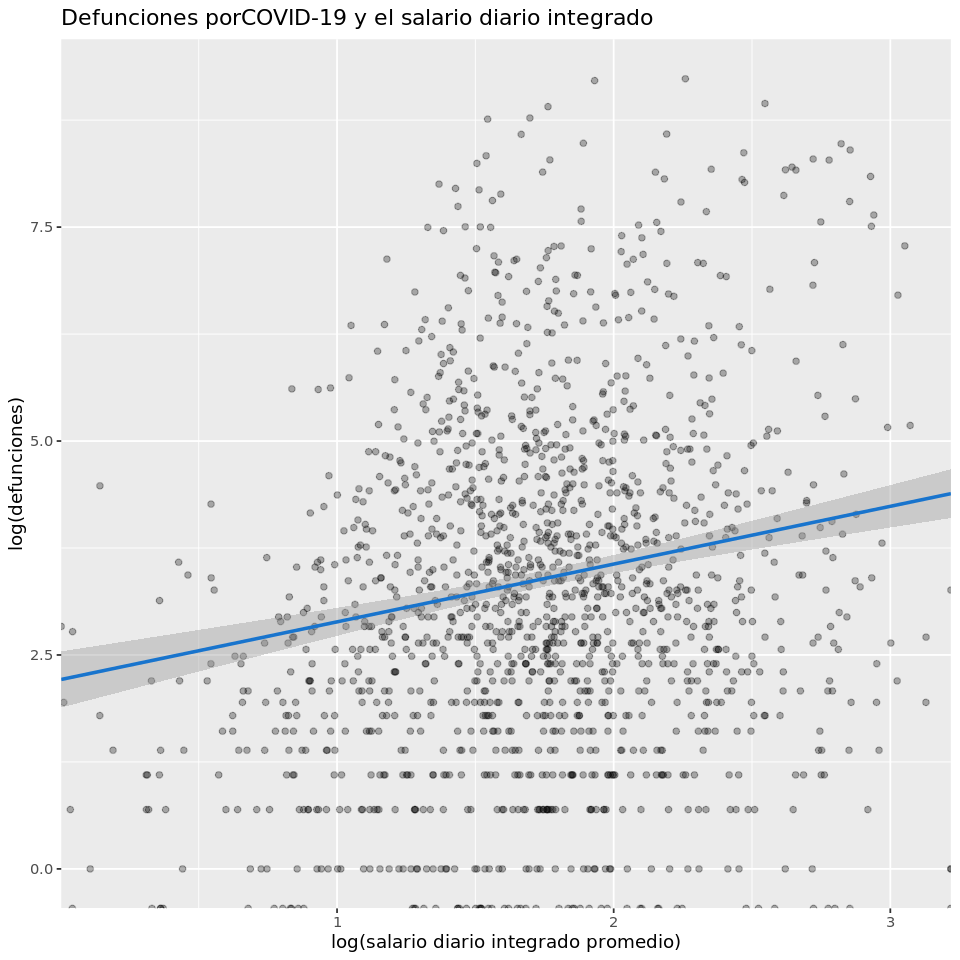

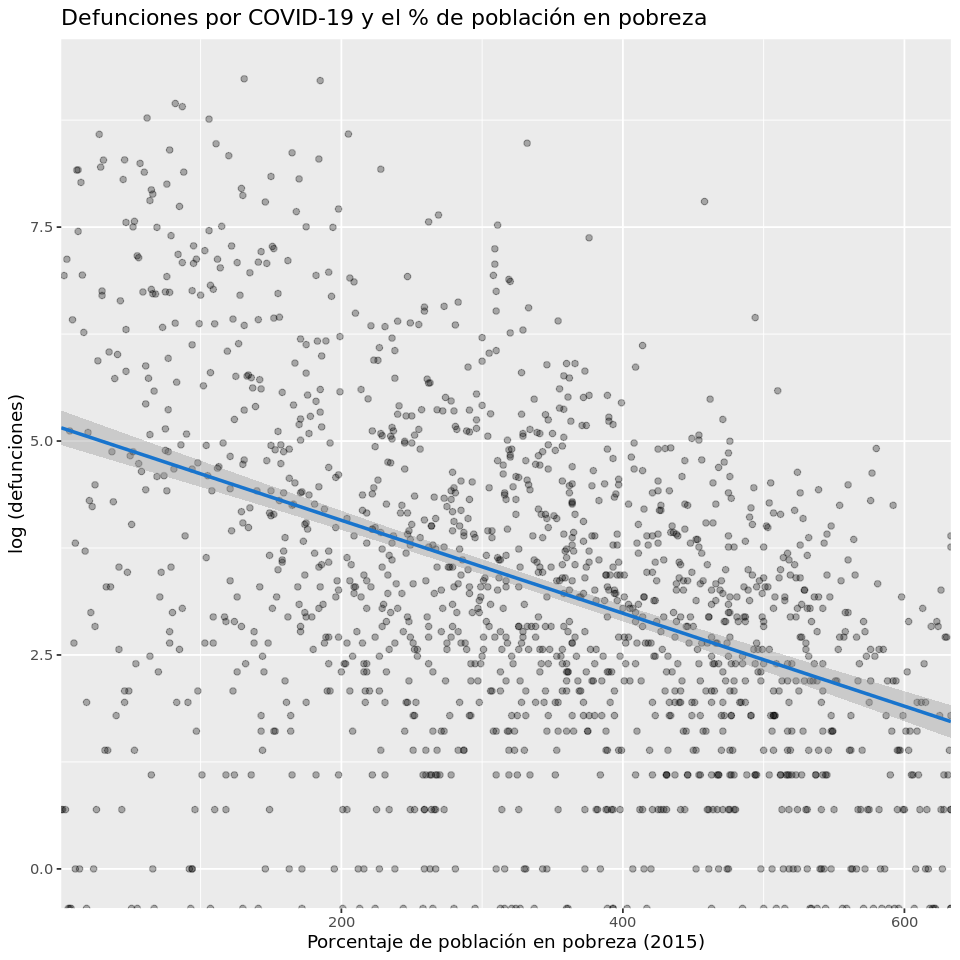

In [11]:
plot_4<-ggplot(mcorr2, aes(x=log_precio, y=log_defunciones_total))
plot_4 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(defunciones)") 

plot_5<-ggplot(mcorr2, aes(x=log_salario, y=log_defunciones_total))
plot_5 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones porCOVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(defunciones)") 

plot_6<-ggplot(mcorr2, aes(x=pob_porc_2015, y=log_defunciones_total))
plot_6 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y el % de población en pobreza", 
       x = "Porcentaje de población en pobreza (2015)", y = "log (defunciones)") 

$Conclusión:$
Las gráficas anteriores mantienen los resultados del Modelo 1: la variable que debe incorporarse al ajuste del modelo es el porcentaje de población en pobreza. Mediante el análisis con las variables del Infonavit en escala logarítmica y el logaritmo de las defunciones, se concluye que no hay relación entre ellas.

## $$ Modelo\ 1:\ Casos\ Confirmados $$ 

Se ajusta el siguiente modelo de regresión multivariada:

In [18]:
m1<-lm(confirmados_total~ precio_mean+pob_porc_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr1)

In [19]:
summary(m1)


Call:
lm(formula = confirmados_total ~ precio_mean + pob_porc_2015 + 
    ts_promedio_h + ts_promedio_r, data = mcorr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1722.0  -237.5   -61.9   108.0  9441.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.714e+02  6.321e+01   4.294 1.87e-05 ***
precio_mean    4.144e-04  6.286e-05   6.592 6.07e-11 ***
pob_porc_2015 -1.114e+00  1.190e-01  -9.356  < 2e-16 ***
ts_promedio_h -3.286e+00  8.308e-01  -3.955 8.02e-05 ***
ts_promedio_r  3.082e+00  2.588e-01  11.907  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 686.1 on 1439 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.2162,	Adjusted R-squared:  0.214 
F-statistic: 99.21 on 4 and 1439 DF,  p-value: < 2.2e-16


In [29]:
ts_m1<-lm(ts_confirmados~ precio_mean+ pob_porc_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr1)

In [30]:
summary(ts_m1)


Call:
lm(formula = ts_confirmados ~ precio_mean + pob_porc_2015 + ts_promedio_h + 
    ts_promedio_r, data = mcorr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-284.33  -80.53  -33.97   36.95 1168.55 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.067e+02  1.347e+01  15.354  < 2e-16 ***
precio_mean    6.984e-05  1.339e-05   5.216 2.10e-07 ***
pob_porc_2015 -3.091e-01  2.536e-02 -12.189  < 2e-16 ***
ts_promedio_h -7.946e-01  1.770e-01  -4.490 7.69e-06 ***
ts_promedio_r  4.781e-01  5.514e-02   8.672  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 146.1 on 1439 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.1984,	Adjusted R-squared:  0.1961 
F-statistic: 89.01 on 4 and 1439 DF,  p-value: < 2.2e-16


In [32]:
mcorr1$log_ts_promedio_h<-log(mcorr1$ts_promedio_h)
mcorr1$log_ts_promedio_r<-log(mcorr1$ts_promedio_r)

In [36]:
log_m1<-lm(log_ts_confirmados ~ log_precio+ pob_porc_2015+ log_ts_promedio_h +log_ts_promedio_r,
            data = mcorr1)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


In [37]:
head(mcorr1)

,confirmados_total,precio_mean,salario_mean,poblacion,ts_promedio_h,ts_promedio_r,pob_porc_2015,pob_per_2015,log_confirmados,log_precio,log_salario,ts_confirmados,log_ts_confirmados,log_ts_promedio_h,log_ts_promedio_r
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2465,450371.7,4.767035,961977,13.99895,225.47317,64,591,7.809947,13.01783,1.561724,256.24313,5.546127,2.638982,5.418201
2,48,351536.1,3.952249,50864,22.60931,35.06082,307,636,3.871201,12.77007,1.374285,94.36930,4.547216,3.118362,3.557084
3,84,418039.4,3.360099,60760,17.55541,58.42660,334,717,4.430817,12.94333,1.211971,138.24885,4.929055,2.865362,4.067771
4,49,368355.9,3.782037,16918,20.68802,45.31663,209,1185,3.891820,12.81680,1.330263,289.63234,5.668612,3.029555,3.813674
5,104,672823.9,7.371576,130184,16.38706,114.83746,58,802,4.644391,13.41924,1.997632,79.88693,4.380612,2.796492,4.743518
6,113,388481.6,4.334164,50032,17.32225,54.96482,130,325,4.727388,12.87000,1.466529,225.85545,5.419895,2.851992,4.006693


## $$ Modelo\ 2:\ Defunciones $$ 

In [24]:
m2<-lm(defunciones_total~ precio_mean+pob_porc_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr2)

In [25]:
summary(m2)


Call:
lm(formula = defunciones_total ~ precio_mean + pob_porc_2015 + 
    ts_promedio_h + ts_promedio_r, data = mcorr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.21  -26.32   -5.31   13.21 1277.11 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.154e+01  8.056e+00   2.673 0.007594 ** 
precio_mean    3.934e-05  8.010e-06   4.911 1.01e-06 ***
pob_porc_2015 -1.073e-01  1.517e-02  -7.071 2.40e-12 ***
ts_promedio_h -3.858e-01  1.059e-01  -3.644 0.000278 ***
ts_promedio_r  4.754e-01  3.299e-02  14.412  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.43 on 1439 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.2159,	Adjusted R-squared:  0.2137 
F-statistic: 99.04 on 4 and 1439 DF,  p-value: < 2.2e-16
